In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymech.dataset import open_mfdataset


df = pd.read_csv("LM_Channel_5200_mean_prof.txt", sep=r'\s+', comment='%')
df

,y_over_delta,y_plus,U,dU_dy,W,P
0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
1,0.000014,0.071102,0.071102,0.999986,-0.000011,-4.717272e-09
2,0.000042,0.216250,0.216244,0.999947,-0.000034,-3.851045e-07
3,0.000085,0.438384,0.438355,0.999819,-0.000069,-6.055743e-06
4,0.000143,0.740447,0.740306,0.999379,-0.000117,-4.477271e-05
...,...,...,...,...,...,...
763,0.991022,5139.336002,26.574682,0.000026,-0.006544,-4.790325e-01
764,0.993017,5149.682732,26.574923,0.000020,-0.006553,-4.789895e-01
765,0.995012,5160.029605,26.575104,0.000015,-0.006562,-4.789556e-01
766,0.997007,5170.376581,26.575224,0.000009,-0.006568,-4.789319e-01


Here:
-   y_over_delta: $y/\delta$ Grid point in wall-normal direction, Normalized by channel half width 
-   y_plus    : Grid point in wall-normal direction 
-   U       : Mean profile of streamwise velocity (normalized with $u^*$)
- dU/dy     : Derivative of U in wall-normal direction 
-   W       : Mean profile of spanwise velocity 
-   P       : Mean profile of pressure 

/home/x_ashmo/.conda/envs/snek/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.17763933359513495


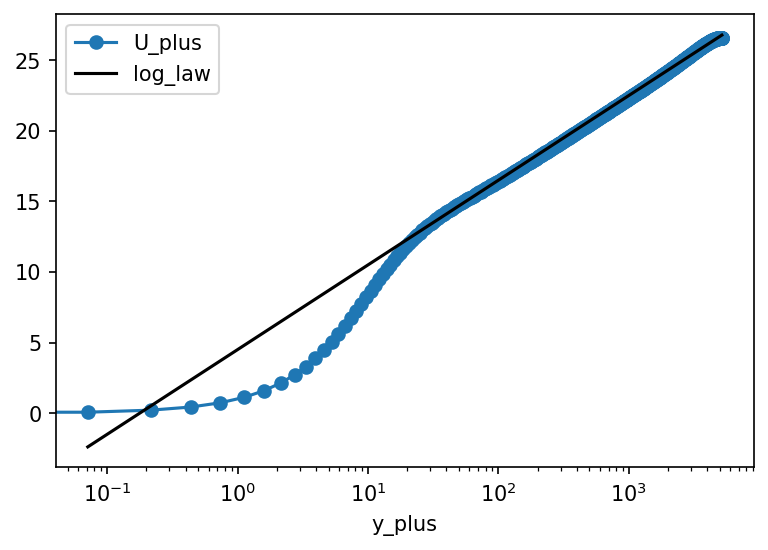

In [2]:
kappa = 0.384
u_star = 1.
B = 4.5
y0 = np.exp(-kappa * B)
df["U_plus"] = df.U / u_star
df["log_law"] = np.log(df.y_plus / y0) / kappa

# Plot
plt.rc("figure", dpi=150)
ax = df.plot("y_plus", "U_plus", marker='o')
df.plot("y_plus", "log_law", ax=ax, color="k")

ax.set(xscale="log")
print(f"{y0}")

In [3]:
y0 / df.y_plus.max()

3.4288517720901714e-05

# Comparison

In [4]:
cd /proj/bolinc/users/x_ashmo/channel_tests/abl_ch-channel_mixing_len_14x4x7_V6.283x2.x3.142_2021-04-08_15-23-17

/proj/bolinc/users/x_ashmo/channel_tests/abl_ch-channel_mixing_len_14x4x7_V6.283x2.x3.142_2021-04-08_15-23-17


In [5]:
spatial_means = pd.read_csv("spatial_means.txt", sep=r'\s+')

In [6]:
spatial_means.tail()

,it,t,ux_avg,ez_avg,u_star_avg,u_star_max,dpdx_avg,dpdy_avg
11994,239900,1499.5,1.0,0.000521,0.026400,0.047683,-6.2832,-6.2832
11995,239920,1499.6,1.0,0.000521,0.026400,0.047697,-6.2832,-6.2832
11996,239940,1499.7,1.0,0.000520,0.026399,0.047718,-6.2832,-6.2832
11997,239960,1499.8,1.0,0.000520,0.026399,0.047734,-6.2832,-6.2832
11998,239980,1499.9,1.0,0.000519,0.026398,0.047754,-6.2832,-6.2832


[Text(0, 0.5, '<u*>')]

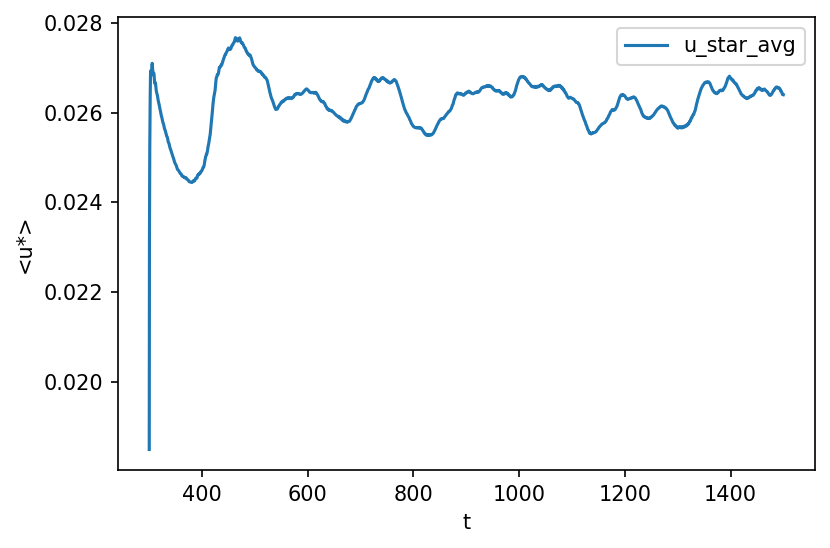

In [7]:
ax = spatial_means.plot("t", "u_star_avg")
ax.set(ylabel="<u*>")

In [8]:
ds = open_mfdataset("stsabl0.f007??")

In [9]:
dss = ds.mean(("x", "z", "time"))

U = (dss.s01**2 + dss.s02**2) ** 0.5

tau = (dss.s47**2 + dss.s50**2)**0.5
u_star = tau.isel(y=0)**0.5
float(u_star)

0.06669730128082715

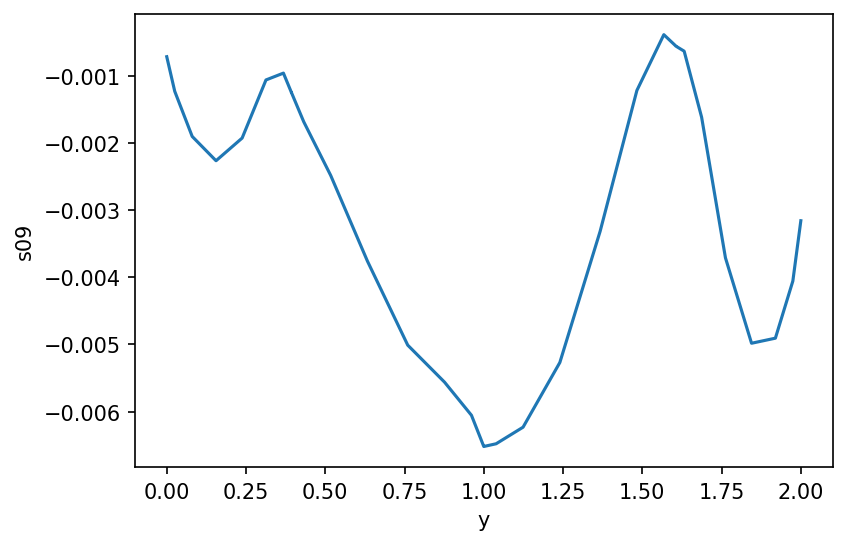

In [10]:
dss.s09.plot()

In [11]:
tau = (dss.s47**2 + dss.s50**2)**0.5

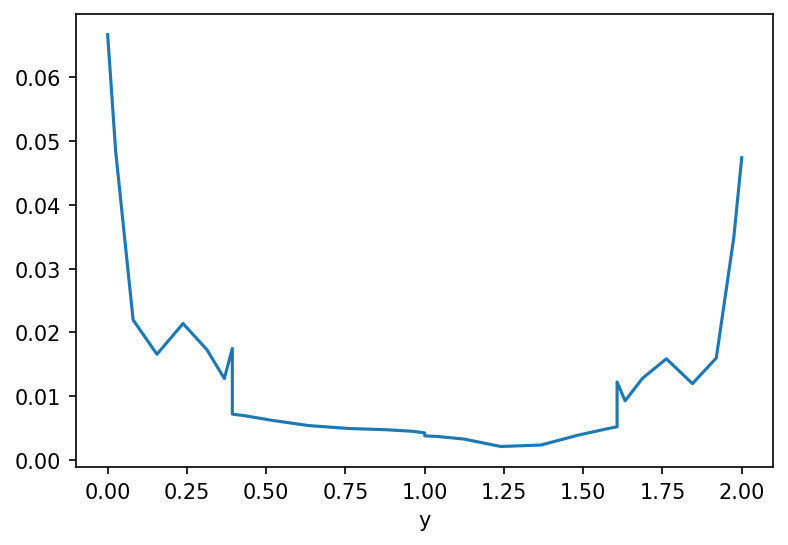

In [12]:
(tau**0.5).plot()

In [13]:
u_star = spatial_means[spatial_means.t > 550].u_star_avg.median()
u_star

0.026367

/home/x_ashmo/.conda/envs/snek/lib/python3.7/site-packages/xarray/core/computation.py:604: RuntimeWarning: divide by zero encountered in log
  result_data = func(*input_data)


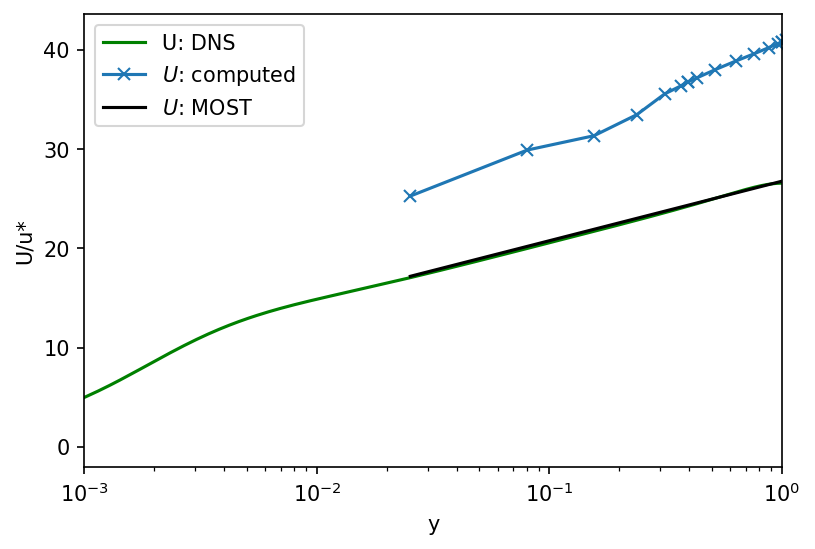

In [14]:
kappa = 0.384 
z = ds.y # + 1e-1
z0 = 3.4289e-5
U_most =  u_star / kappa * np.log(z / z0)

fig, ax = plt.subplots(dpi=150)
df.plot("y_over_delta", "U_plus", color="g", ax=ax, label="U: DNS")


ax.plot(z[1:], (U / u_star)[1:], marker="x", label=r"$U$: computed")
ax.plot(z[1:], (U_most / u_star)[1:], color="k", label=r'$U$: MOST')
ax.set(xscale="log", xlabel="y", ylabel="U/u*", xlim=(1e-3, 1))
ax.legend()

# The indicator function

Theoretically $$\frac{\partial U^+}{\partial y^+} = \frac{1}{\kappa y^+}$$ in the log-law region to check this we use the indicator function $$\beta (y^+) = y^+ \frac{\partial U^+}{\partial y^+}$$

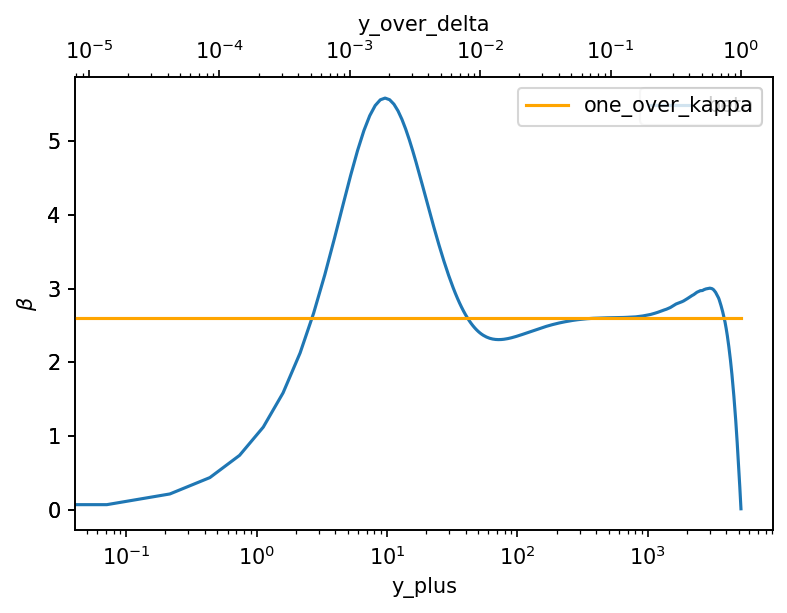

In [22]:
df["beta"] = df.y_plus * df.dU_dy
df["one_over_kappa"] = 1 / kappa

ax = df.plot("y_plus", "beta")
ax_top = ax.twiny()
df.plot("y_over_delta", "one_over_kappa", color='orange', ax=ax_top)
ax.set(ylabel=r"$\beta$", xscale="log")
ax_top.set(xscale="log")
ax.legend()